In [1]:
#Import Libraries
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error

In [2]:
#load boston data

BostonData = load_boston()

#X Data
X = BostonData.data
#y Data
y = BostonData.target

c:\users\olaab\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

In [3]:
#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)


In [4]:
#Applying MLPRegressor Model 

'''
#sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(100, ), activation='relu’, solver=’adam’,
#                                    alpha=0.0001,batch_size='auto’, learning_rate=’constant’,
#                                    learning_rate_init=0.001, power_t=0.5,max_iter=200, shuffle=True,
#                                    random_state=None,tol=0.0001, verbose=False, warm_start=False,
#                                    momentum=0.9, nesterovs_momentum=True,early_stopping=False,
#                                    validation_fraction=0.1,beta_1=0.9, beta_2=0.999, epsilon=1E-08,
#                                    n_iter_no_change=10)
'''

MLPRegressorModel = MLPRegressor(activation='tanh', # can be also identity , logistic , relu
                                 solver='lbfgs',  # can be also sgd , adam
                                 learning_rate='constant', # can be also invscaling , adaptive
                                 early_stopping= False,
                                 alpha=0.0001 ,hidden_layer_sizes=(100, 3),random_state=33)
MLPRegressorModel.fit(X_train, y_train)


c:\users\olaab\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(activation='tanh', hidden_layer_sizes=(100, 3), random_state=33,
             solver='lbfgs')

In [5]:
#Calculating Details
print('MLPRegressorModel Train Score is : ' , MLPRegressorModel.score(X_train, y_train))
print('MLPRegressorModel Test Score is : ' , MLPRegressorModel.score(X_test, y_test))
print('MLPRegressorModel loss is : ' , MLPRegressorModel.loss_)
print('MLPRegressorModel No. of iterations is : ' , MLPRegressorModel.n_iter_)
print('MLPRegressorModel No. of layers is : ' , MLPRegressorModel.n_layers_)
print('MLPRegressorModel last activation is : ' , MLPRegressorModel.out_activation_)

MLPRegressorModel Train Score is :  0.6490215494107063
MLPRegressorModel Test Score is :  0.6092479892566247
MLPRegressorModel loss is :  13.49338488605845
MLPRegressorModel No. of iterations is :  200
MLPRegressorModel No. of layers is :  4
MLPRegressorModel last activation is :  identity


In [6]:
#Calculating Prediction
y_pred = MLPRegressorModel.predict(X_test)
print('Predicted Value for MLPRegressorModel is : ' , y_pred[:10])

Predicted Value for MLPRegressorModel is :  [20.72087049 20.82822935 17.26910082 34.16355887 16.78755729 34.10253867
 17.2057161  20.79617312 25.6082921  29.7995542 ]


In [7]:
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Absolute Error Value is : ', MAEValue)

Mean Absolute Error Value is :  4.553760792702353


In [8]:
#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is : ', MSEValue)

Mean Squared Error Value is :  38.43352459639616


In [9]:
#Calculating Median Squared Error
MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Squared Error Value is : ', MdSEValue )

Median Squared Error Value is :  3.2228083043320765


x  = 
 (1000, 1)
y  = 
 (1000,)


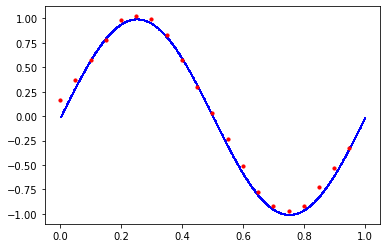

In [11]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 1, 0.001).reshape(-1, 1)
y = np.sin(2 * np.pi * x).ravel()

print('x  = \n' ,x.shape)
print('y  = \n' ,y.shape)


nn = MLPRegressor(
    hidden_layer_sizes=(100,),  activation='relu', solver='adam', alpha=0.001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
    random_state=0, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

n = nn.fit(x, y)
test_x = np.arange(0.0, 1, 0.05).reshape(-1, 1)
test_y = nn.predict(test_x)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x, y, s=1, c='b', marker="s", label='real')
ax1.scatter(test_x,test_y, s=10, c='r', marker="o", label='NN Prediction')
plt.show()